In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("../../../"))
from pydistsim import NetworkGenerator
from pydistsim import *

In [2]:
from pydistsim.logger import logger

In [3]:
net_gen = NetworkGenerator(n_count=15)
net = net_gen.generate_random_network()

2024-05-09 21:49:55.088 | WARNING  | pydistsim.conf:_setup:92 - Environment variable PYDISTSIM_SETTINGS_MODULE is undefined, using global_settings.
2024-05-09 21:49:55.089 | INFO     | pydistsim.conf:__init__:144 - Setting ACTUATORS on global value: ()
2024-05-09 21:49:55.090 | INFO     | pydistsim.conf:__init__:144 - Setting ALGORITHMS on global value: ()
2024-05-09 21:49:55.090 | INFO     | pydistsim.conf:__init__:144 - Setting AOA_PF_PARAMS on global value: {'pf': <scipy.stats._continuous_distns.norm_gen object at 0x7f17bb8c0ed0>, 'scale': 0.17453292519943295}
2024-05-09 21:49:55.091 | INFO     | pydistsim.conf:__init__:144 - Setting CHANNEL_TYPE on global value: Udg
2024-05-09 21:49:55.091 | INFO     | pydistsim.conf:__init__:144 - Setting COMM_RANGE on global value: 100
2024-05-09 21:49:55.092 | INFO     | pydistsim.conf:__init__:144 - Setting DEG_ATOL on global value: 1
2024-05-09 21:49:55.092 | INFO     | pydistsim.conf:__init__:144 - Setting DIST_PF_PARAMS on global value: {'pf

/home/agus/.pymote_venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/mnt/d/Proyectos/pymote/pydistsim/network.py:340: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


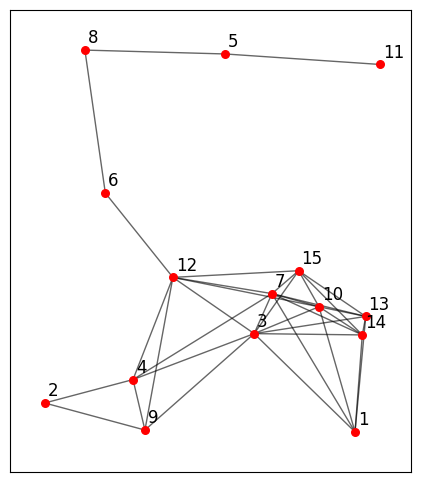

In [4]:
net.show()

In [5]:
from pydistsim.algorithms.broadcast import Flood

# Asigna el algoritmo
net.algorithms = ((Flood, {"informationKey": "I"}),)

# Asigna el mensaje a enviar, la información inicial
some_node = net.nodes_sorted()[0]
some_node.memory["I"] = "Hello distributed world"

2024-05-09 21:49:56.004 | INFO     | pydistsim.network:reset:334 - Resetting network.
2024-05-09 21:49:56.006 | INFO     | pydistsim.network:reset_all_nodes:476 - Resetting all nodes.
2024-05-09 21:49:56.007 | DEBUG    | pydistsim.algorithm:__init__:122 - Instance of Flood class has been initialized.


In [6]:
from pydistsim.npickle import write_npickle, read_npickle

# Escribir la red + algoritmo en un archivo
write_npickle(net, "mreza1.tar.gz")
net_from_file = read_npickle("mreza1.tar.gz")
net_from_file

2024-05-09 21:49:56.027 | INFO     | pydistsim.npickle:write_pickle:54 - instance of <class 'pydistsim.network.Network'> saved in mreza1.tar.gz
2024-05-09 21:49:56.036 | INFO     | pydistsim.npickle:read_pickle:75 - instance of <class 'pydistsim.network.Network'> loaded: mreza1.tar.gz


In [7]:
# Correr la simulación
%run ../../../pydistsim/gui/simulationgui.py

In [8]:
sim = Simulation(net)

2024-05-09 21:49:56.364 | DEBUG    | pydistsim.simulation:__init__:32 - Simulation 0x7f180c69a9c0 created successfully.


In [9]:
sim.run(1)

2024-05-09 21:49:56.377 | DEBUG    | pydistsim.network:send:551 - Sending message from None to <Node id=1>.
2024-05-09 21:49:56.378 | DEBUG    | pydistsim.simulation:run_algorithm:117 - [Flood] Step 1 finished


In [10]:
sim.run(1)

2024-05-09 21:49:56.390 | DEBUG    | pydistsim.node:receive:103 - Node 1 received message 
------ Message 'INITIALIZATION_MESSAGE' ------ 
     source = None 
destination = <Node id=1> 
     header = '' 
id(message) = 0x7f17b4cd3150>
2024-05-09 21:49:56.392 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f17b4cd3150
2024-05-09 21:49:56.393 | DEBUG    | pydistsim.node:send:81 - Node 1 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=1> 
destination = Broadcasting 
     header = 'Information' 
id(message) = 0x7f17ba030350>.
2024-05-09 21:49:56.394 | DEBUG    | pydistsim.simulation:run_algorithm:117 - [Flood] Step 2 finished


In [11]:
sim.run(1)

2024-05-09 21:49:56.421 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=1> to <Node id=14>.
2024-05-09 21:49:56.422 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=1> to <Node id=10>.
2024-05-09 21:49:56.423 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=1> to <Node id=13>.
2024-05-09 21:49:56.424 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=1> to <Node id=3>.
2024-05-09 21:49:56.425 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=1> to <Node id=7>.
2024-05-09 21:49:56.426 | DEBUG    | pydistsim.simulation:run_algorithm:117 - [Flood] Step 3 finished


In [12]:
sim.run(1)

2024-05-09 21:49:56.448 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=1> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f180c6a7b90>
2024-05-09 21:49:56.450 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6a7b90
2024-05-09 21:49:56.451 | DEBUG    | pydistsim.node:send:81 - Node 3 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=3> 
destination = [<Node id=7>, <Node id=10>, <Node id=15>, <Node id=12>, <Node id=13>, <Node id=14>, <Node id=4>, <Node id=9>] 
     header = 'Information' 
id(message) = 0x7f181c2fe1d0>.
2024-05-09 21:49:56.452 | DEBUG    | pydistsim.node:send:81 - Node 3 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=3> 
destination = [<Node id=7>, <Node id=10>, <Node id=15>, <Node id=12>, <Node id=13>, <Node id=14>, <Node id=4>, <Node id=9>] 
     header = 'Information' 
id

In [13]:
sim.run(1)

2024-05-09 21:49:56.515 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=10>.
2024-05-09 21:49:56.517 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=13>.
2024-05-09 21:49:56.517 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=15>.
2024-05-09 21:49:56.518 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=3>.
2024-05-09 21:49:56.519 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=7>.
2024-05-09 21:49:56.519 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=13> to <Node id=10>.
2024-05-09 21:49:56.520 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=13> to <Node id=14>.
2024-05-09 21:49:56.522 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=13> to <Node id=15>.
2024-05-09 21:49:56.523 | DEBUG    | pydistsim.network:send:551 - 

In [14]:
sim.run(1)

2024-05-09 21:49:56.570 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=14> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f17ba030310>
2024-05-09 21:49:56.571 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f17ba030310
2024-05-09 21:49:56.572 | DEBUG    | pydistsim.node:receive:103 - Node 4 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=7> 
destination = <Node id=4> 
     header = 'Information' 
id(message) = 0x7f180c6a7f90>
2024-05-09 21:49:56.573 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6a7f90
2024-05-09 21:49:56.574 | DEBUG    | pydistsim.node:send:81 - Node 4 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=4> 
destination = [<Node id=9>, <Node id=2>, <Node id=12>, <Node id=3>] 
     header = 'Information' 
id(message) = 0x7f180c6a9990>.
20

In [15]:
sim.run(1)

2024-05-09 21:49:56.609 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=7>.
2024-05-09 21:49:56.611 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=10>.
2024-05-09 21:49:56.612 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=3>.
2024-05-09 21:49:56.613 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=13>.
2024-05-09 21:49:56.613 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=12>.
2024-05-09 21:49:56.614 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=12> to <Node id=3>.
2024-05-09 21:49:56.615 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=12> to <Node id=4>.
2024-05-09 21:49:56.615 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=12> to <Node id=6>.
2024-05-09 21:49:56.616 | DEBUG    | pydistsim.network:send:551 - Sen

In [16]:
sim.run(1)

2024-05-09 21:49:56.642 | DEBUG    | pydistsim.node:receive:103 - Node 2 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=9> 
destination = <Node id=2> 
     header = 'Information' 
id(message) = 0x7f180c6a9d50>
2024-05-09 21:49:56.643 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6a9d50
2024-05-09 21:49:56.644 | DEBUG    | pydistsim.node:send:81 - Node 2 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=2> 
destination = [<Node id=4>] 
     header = 'Information' 
id(message) = 0x7f180c6ac990>.
2024-05-09 21:49:56.645 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=10> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f180c69ac50>
2024-05-09 21:49:56.646 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c69ac50
2024-05-09 21:49:56.647 | DEBUG    | pydis

In [17]:
sim.run(1)

2024-05-09 21:49:56.670 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=6> to <Node id=8>.
2024-05-09 21:49:56.671 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=2> to <Node id=4>.
2024-05-09 21:49:56.672 | DEBUG    | pydistsim.node:receive:103 - Node 2 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=4> 
destination = <Node id=2> 
     header = 'Information' 
id(message) = 0x7f180c6b23d0>
2024-05-09 21:49:56.673 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6b23d0
2024-05-09 21:49:56.673 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=7> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f181c2fe1d0>
2024-05-09 21:49:56.674 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f181c2fe1d0
2024-05-09 21:49:56.675 | DEBUG    | pydistsim.node:

In [18]:
sim.run(1)

2024-05-09 21:49:56.731 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=15> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f180c6a5710>
2024-05-09 21:49:56.732 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6a5710
2024-05-09 21:49:56.733 | DEBUG    | pydistsim.node:receive:103 - Node 4 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=2> 
destination = <Node id=4> 
     header = 'Information' 
id(message) = 0x7f180c6abb90>
2024-05-09 21:49:56.733 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6abb90
2024-05-09 21:49:56.734 | DEBUG    | pydistsim.node:receive:103 - Node 7 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=15> 
destination = <Node id=7> 
     header = 'Information' 
id(message) = 0x7f180c6bbf50>
2024-05-09 21:49:56.735 | DEBUG    |

In [19]:
sim.run(1)

2024-05-09 21:49:56.756 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=8> to <Node id=5>.
2024-05-09 21:49:56.757 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=12> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f180c6abdd0>
2024-05-09 21:49:56.758 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6abdd0
2024-05-09 21:49:56.759 | DEBUG    | pydistsim.node:receive:103 - Node 7 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=12> 
destination = <Node id=7> 
     header = 'Information' 
id(message) = 0x7f180c6b17d0>
2024-05-09 21:49:56.760 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6b17d0
2024-05-09 21:49:56.761 | DEBUG    | pydistsim.node:receive:103 - Node 12 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=4> 
destin

In [20]:
sim.run(1)

2024-05-09 21:49:56.772 | DEBUG    | pydistsim.node:receive:103 - Node 3 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=4> 
destination = <Node id=3> 
     header = 'Information' 
id(message) = 0x7f180c6b2390>
2024-05-09 21:49:56.774 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6b2390
2024-05-09 21:49:56.774 | DEBUG    | pydistsim.node:receive:103 - Node 5 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=8> 
destination = <Node id=5> 
     header = 'Information' 
id(message) = 0x7f180c6c41d0>
2024-05-09 21:49:56.775 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6c41d0
2024-05-09 21:49:56.776 | DEBUG    | pydistsim.node:send:81 - Node 5 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=5> 
destination = [<Node id=11>] 
     header = 'Information' 
id(message) = 0x7f180c6acc90>.
2024-05-09 21:49:56.776 | DEBUG    | pydis

In [21]:
sim.run(1)

2024-05-09 21:49:56.785 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=5> to <Node id=11>.
2024-05-09 21:49:56.787 | DEBUG    | pydistsim.simulation:run_algorithm:117 - [Flood] Step 13 finished


In [22]:
sim.run(1)

2024-05-09 21:49:56.796 | DEBUG    | pydistsim.node:receive:103 - Node 11 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=5> 
destination = <Node id=11> 
     header = 'Information' 
id(message) = 0x7f180c6b08d0>
2024-05-09 21:49:56.797 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f180c6b08d0
2024-05-09 21:49:56.798 | DEBUG    | pydistsim.simulation:run_algorithm:117 - [Flood] Step 14 finished


In [23]:
sim.run(1)

2024-05-09 21:49:56.806 | DEBUG    | pydistsim.simulation:run_algorithm:130 - [Flood] Algorithm finished


In [24]:
sim.run(1)

2024-05-09 21:49:56.813 | INFO     | pydistsim.simulation:run:77 - Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


In [25]:
sim.run()

2024-05-09 21:49:56.825 | INFO     | pydistsim.simulation:run:77 - Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().
